## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import time


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [5]:
fmnist_dataset_train_new = [fmnist_dataset_train[i] for i in range(len(fmnist_dataset_train)) if i <= 1000]

In [6]:
train_loader_for_overfit = torch.utils.data.DataLoader(fmnist_dataset_train_new, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)

10000


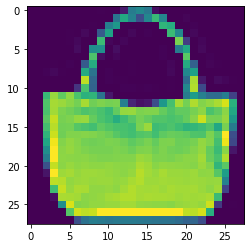

In [18]:
print(len(fmnist_dataset_test))
plt.imshow(fmnist_dataset_train[100][0][0].numpy())

In [8]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 64),
            nn.Sigmoid(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 128),
            nn.Sigmoid(),
            nn.BatchNorm1d(128),
            nn.Linear(128, num_classes),
            nn.Softmax()
            
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
           Sigmoid-3                  [-1, 256]               0
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 256]          65,792
           Sigmoid-6                  [-1, 256]               0
            Linear-7                  [-1, 256]          65,792
           Sigmoid-8                  [-1, 256]               0
       BatchNorm1d-9                  [-1, 256]             512
           Linear-10                   [-1, 10]           2,570
          Softmax-11                   [-1, 10]               0
Total params: 336,138
Trainable params: 336,138
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Your experiments come here:

In [ ]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

# Your experiments, training and validation loops here 

In [8]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int, device=device):
    train_loss = []
    val_loss = []
    val_accuracy = []
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            opt.zero_grad()
            # move data to target device
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            out = model(X_batch)
            loss = loss_fn(out, y_batch)
            loss.backward()
            opt.step()
            ep_train_loss.append(loss.item())

        model.train(False) # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
                out = model(X_batch)
                loss = loss_fn(out, y_batch)


                # compute predictions
                ep_val_loss.append(loss.item())
                y_pred = out.max(dim=1)[1]
                ep_val_accuracy.append(np.sum(y_batch.cpu().numpy() == y_pred.cpu().numpy().astype(float))/ len(y_batch.cpu()))
        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")
    return train_loss, val_loss, val_accuracy

In [ ]:
n_epochs = 5
train_loss, val_loss, val_accuracy = train_model(model, train_loader, test_loader, loss_func, opt, n_epochs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 of 5 took 6.482s
	  training loss: 1.532918
	validation loss: 1.575410
	validation accuracy: 0.885
Epoch 2 of 5 took 6.530s
	  training loss: 1.533262
	validation loss: 1.578899
	validation accuracy: 0.882
Epoch 3 of 5 took 6.439s
	  training loss: 1.531646
	validation loss: 1.578625
	validation accuracy: 0.882
Epoch 4 of 5 took 6.486s
	  training loss: 1.532215
	validation loss: 1.575583
	validation accuracy: 0.886
Epoch 5 of 5 took 6.507s
	  training loss: 1.534558
	validation loss: 1.574270
	validation accuracy: 0.886


In [9]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)

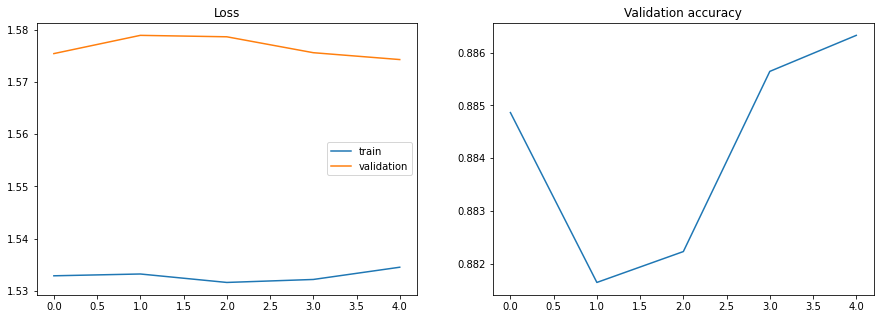

In [ ]:
plot_train_process(train_loss, val_loss, val_accuracy)

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [14]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_classes),
            nn.Softmax(),
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [15]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2048]       1,607,680
              ReLU-3                 [-1, 2048]               0
            Linear-4                 [-1, 2048]       4,196,352
              ReLU-5                 [-1, 2048]               0
            Linear-6                 [-1, 1024]       2,098,176
              ReLU-7                 [-1, 1024]               0
            Linear-8                   [-1, 10]          10,250
           Softmax-9                   [-1, 10]               0
Total params: 7,912,458
Trainable params: 7,912,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 30.18
Estimated Total Size (MB): 30.27
-------------------------------------

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [16]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

# Your experiments, come here
n_epochs = 100
train_loss, val_loss, val_accuracy = train_model(model, train_loader_for_overfit, test_loader, loss_func, opt, n_epochs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 of 100 took 0.933s
	  training loss: 2.164257
	validation loss: 2.021220
	validation accuracy: 0.439
Epoch 2 of 100 took 0.928s
	  training loss: 1.981413
	validation loss: 1.917282
	validation accuracy: 0.544
Epoch 3 of 100 took 0.930s
	  training loss: 1.889642
	validation loss: 1.896812
	validation accuracy: 0.559
Epoch 4 of 100 took 0.937s
	  training loss: 1.862233
	validation loss: 1.875835
	validation accuracy: 0.581
Epoch 5 of 100 took 0.908s
	  training loss: 1.820833
	validation loss: 1.823398
	validation accuracy: 0.640
Epoch 6 of 100 took 0.922s
	  training loss: 1.800643
	validation loss: 1.852005
	validation accuracy: 0.607
Epoch 7 of 100 took 0.993s
	  training loss: 1.807883
	validation loss: 1.828126
	validation accuracy: 0.634
Epoch 8 of 100 took 0.948s
	  training loss: 1.775994
	validation loss: 1.806105
	validation accuracy: 0.650
Epoch 9 of 100 took 0.956s
	  training loss: 1.732475
	validation loss: 1.784280
	validation accuracy: 0.674
Epoch 10 of 100 too

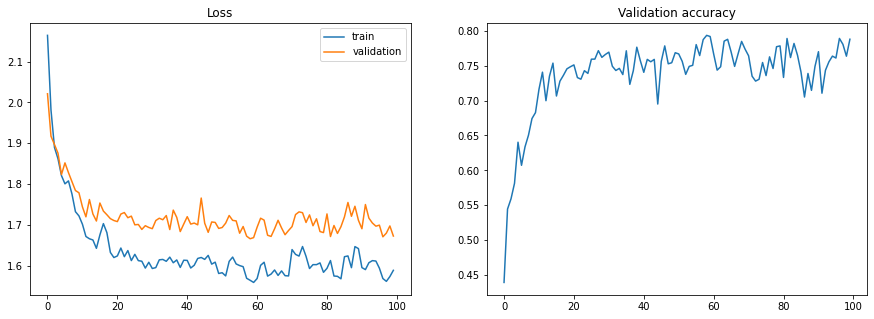

In [17]:
plot_train_process(train_loss, val_loss, val_accuracy)

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [46]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(),
            nn.Sigmoid(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(),
            nn.Sigmoid(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_classes),
            nn.Softmax(),
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [47]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2048]       1,607,680
              ReLU-3                 [-1, 2048]               0
       BatchNorm1d-4                 [-1, 2048]           4,096
           Dropout-5                 [-1, 2048]               0
           Sigmoid-6                 [-1, 2048]               0
            Linear-7                 [-1, 2048]       4,196,352
              ReLU-8                 [-1, 2048]               0
       BatchNorm1d-9                 [-1, 2048]           4,096
          Dropout-10                 [-1, 2048]               0
          Sigmoid-11                 [-1, 2048]               0
           Linear-12                 [-1, 1024]       2,098,176
             ReLU-13                 [-1, 1024]               0
           Linear-14                   

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [48]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

# Your experiments, come here
n_epochs = 100
train_loss, val_loss, val_accuracy = train_model(model, train_loader_for_overfit, test_loader, loss_func, opt, n_epochs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 of 100 took 0.920s
	  training loss: 2.188834
	validation loss: 2.086810
	validation accuracy: 0.375
Epoch 2 of 100 took 0.906s
	  training loss: 2.032974
	validation loss: 1.988691
	validation accuracy: 0.471
Epoch 3 of 100 took 0.904s
	  training loss: 1.926384
	validation loss: 1.915969
	validation accuracy: 0.542
Epoch 4 of 100 took 0.906s
	  training loss: 1.853387
	validation loss: 1.880453
	validation accuracy: 0.586
Epoch 5 of 100 took 0.897s
	  training loss: 1.828388
	validation loss: 1.860488
	validation accuracy: 0.600
Epoch 6 of 100 took 0.907s
	  training loss: 1.808292
	validation loss: 1.855998
	validation accuracy: 0.605
Epoch 7 of 100 took 0.935s
	  training loss: 1.811295
	validation loss: 1.859451
	validation accuracy: 0.602
Epoch 8 of 100 took 0.910s
	  training loss: 1.796352
	validation loss: 1.880516
	validation accuracy: 0.580
Epoch 9 of 100 took 0.907s
	  training loss: 1.790654
	validation loss: 1.836775
	validation accuracy: 0.624
Epoch 10 of 100 too

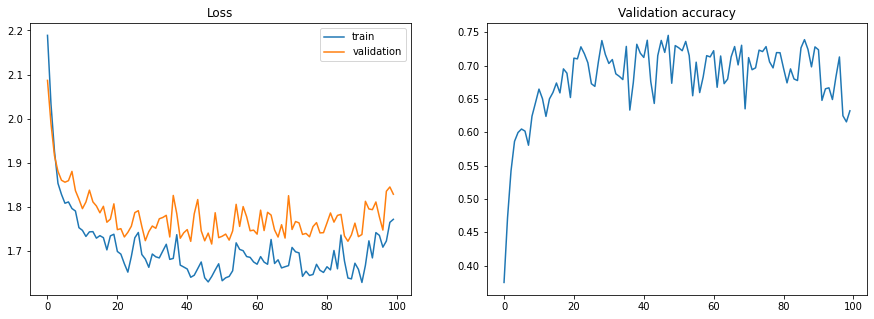

In [49]:
plot_train_process(train_loss, val_loss, val_accuracy)

### Conclusions:
_Write down small report with your conclusions and your ideas._